In [ ]:
import pandas as pd
import numpy as np
import nltk
from nltk.corpus import stopwords
from nltk.stem import WordNetLemmatizer
import re

In [7]:
# Download stopwords and wordnet
ntlk dowload()
nltk.download('stopwords')
nltk.download('wordnet')

# Initialize lemmatizer and stopwords
lemmatizer = WordNetLemmatizer()
stop_words = set(stopwords.words('english'))

NameError: name 'nltk' is not defined

In [2]:
# Load the dataset
import pandas as pd
data = pd.read_csv('/content/fake_news_detection_dataset.csv')

# Display basic info about the dataset
print('Dataset Info:')
print(data.info())
print('\nSample Data:')
print(data.head())

Dataset Info:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 15000 entries, 0 to 14999
Data columns (total 3 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   title   15000 non-null  object
 1   text    15000 non-null  object
 2   label   15000 non-null  object
dtypes: object(3)
memory usage: 351.7+ KB
None

Sample Data:
                  title                                               text  \
0  News Article Title 0  This is the content of the news article 0. It ...   
1  News Article Title 1  This is the content of the news article 1. It ...   
2  News Article Title 2  This is the content of the news article 2. It ...   
3  News Article Title 3  This is the content of the news article 3. It ...   
4  News Article Title 4  This is the content of the news article 4. It ...   

  label  
0  Fake  
1  Real  
2  Fake  
3  Fake  
4  Fake  


In [ ]:
# Remove missing values and duplicates
data.dropna(inplace=True)
data.drop_duplicates(inplace=True)

In [ ]:
# Text Preprocessing Function
def preprocess_text(text):
    # Lowercase the text
    text = text.lower()
    # Remove special characters and digits
    text = re.sub(r'[^a-zA-Z\s]', '', text)
    # Tokenize and remove stopwords
    tokens = text.split()
    tokens = [word for word in tokens if word not in stop_words]
    # Lemmatize the words
    tokens = [lemmatizer.lemmatize(word) for word in tokens]
    # Join tokens back into a single string
    return ' '.join(tokens)

In [ ]:
import pandas as pd

# Load the dataset
data = pd.read_csv('fake_news_detection_dataset.csv')

# Define a sample preprocessing function (customize as needed)
import re
import string

def preprocess_text(text):
    if pd.isnull(text):
        return ""
    text = text.lower()  # Lowercase
    text = re.sub(r'\d+', '', text)  # Remove numbers
    text = text.translate(str.maketrans('', '', string.punctuation))  # Remove punctuation
    text = re.sub(r'\s+', ' ', text).strip()  # Remove extra spaces
    return text

# Check for 'text' column and apply preprocessing
if 'text' in data.columns:
    data['cleaned_text'] = data['text'].apply(preprocess_text)

    # Display a sample of cleaned data
    print('\nCleaned Data Sample:')
    print(data[['text', 'cleaned_text']].head())

    # Save the cleaned dataset
    data.to_csv('cleaned_fake_news_dataset.csv', index=False)
    print('Data Preprocessing Completed and Saved as cleaned_fake_news_dataset.csv')
else:
    print("Error: 'text' column not found in the dataset.")



Cleaned Data Sample:
                                                text  \
0  This is the content of the news article 0. It ...   
1  This is the content of the news article 1. It ...   
2  This is the content of the news article 2. It ...   
3  This is the content of the news article 3. It ...   
4  This is the content of the news article 4. It ...   

                                        cleaned_text  
0  this is the content of the news article it dis...  
1  this is the content of the news article it dis...  
2  this is the content of the news article it dis...  
3  this is the content of the news article it dis...  
4  this is the content of the news article it dis...  
Data Preprocessing Completed and Saved as cleaned_fake_news_dataset.csv


In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from wordcloud import WordCloud

# Load the cleaned dataset
data = pd.read_csv('/content/fake_news_detection_dataset.csv')

# Display basic statistics
print('Label Distribution:')
print(data['label'].value_counts())


Label Distribution:
label
Fake    7521
Real    7479
Name: count, dtype: int64


In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from wordcloud import WordCloud

# Load the cleaned dataset
data = pd.read_csv('/content/fake_news_detection_dataset.csv')

# Display basic statistics
print('Label Distribution:')
print(data['label'].value_counts())


Label Distribution:
label
Fake    7521
Real    7479
Name: count, dtype: int64


<ipython-input-17-babbab5d63fb>:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x='label', data=data, palette='Set2')


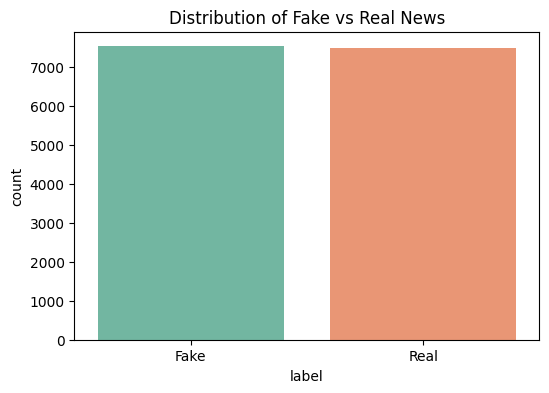

In [ ]:
# Plot label distribution
plt.figure(figsize=(6,4))
sns.countplot(x='label', data=data, palette='Set2')
plt.title('Distribution of Fake vs Real News')
plt.show()

Text(0.5, 1.0, 'Fake News Word Cloud')

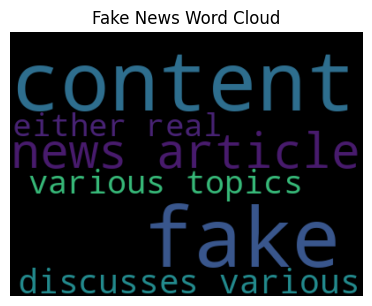

In [ ]:
# Generate word clouds for Fake and Real news
plt.figure(figsize=(10,5))

# Word Cloud for Fake News
plt.subplot(1, 2, 1)
fake_news = data[data['label'] == 'Fake']
wordcloud_fake = WordCloud(width=400, height=300, background_color='black').generate(' '.join(fake_news['cleaned_text']))
plt.imshow(wordcloud_fake, interpolation='bilinear')
plt.axis('off')
plt.title('Fake News Word Cloud')

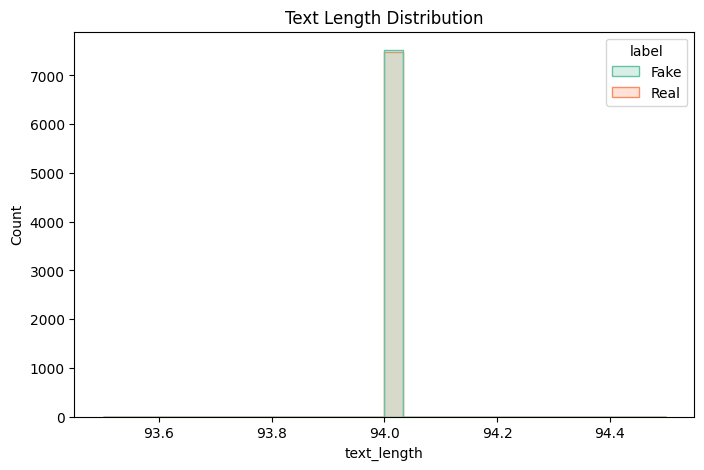

In [ ]:
# Plot text length distribution
data['text_length'] = data['cleaned_text'].apply(len)
plt.figure(figsize=(8,5))
sns.histplot(data=data, x='text_length', hue='label', element='step', bins=30, palette='Set2')
plt.title('Text Length Distribution')
plt.show()

In [ ]:
import pandas as pd
import re
import string
from sklearn.feature_extraction.text import TfidfVectorizer
import pickle

# Load the dataset
data = pd.read_csv('/content/fake_news_detection_dataset.csv')  # Update path if needed

# Define the text preprocessing function
def preprocess_text(text):
    if pd.isnull(text):
        return ""
    text = text.lower()  # Lowercase
    text = re.sub(r'\d+', '', text)  # Remove digits
    text = text.translate(str.maketrans('', '', string.punctuation))  # Remove punctuation
    text = re.sub(r'\s+', ' ', text).strip()  # Remove extra whitespace
    return text

# Apply preprocessing to the 'text' column
data['cleaned_text'] = data['text'].apply(preprocess_text)

# TF-IDF Vectorization
tfidf_vectorizer = TfidfVectorizer(max_features=5000, ngram_range=(1, 2))
X = tfidf_vectorizer.fit_transform(data['cleaned_text'])

# Save the cleaned dataset
data.to_csv('cleaned_fake_news_dataset.csv', index=False)

# Save the TF-IDF vectorizer
with open('tfidf_vectorizer.pkl', 'wb') as f:
    pickle.dump(tfidf_vectorizer, f)

print("TF-IDF vectorization completed.")
print("Shape of TF-IDF matrix:", X.shape)
print("Cleaned dataset saved as 'cleaned_fake_news_dataset.csv'")


TF-IDF vectorization completed.
Shape of TF-IDF matrix: (15000, 33)
Cleaned dataset saved as 'cleaned_fake_news_dataset.csv'


In [ ]:
# Display the shape of the feature matrix
print(f'Feature Matrix Shape: {X.shape}')

# Save the vectorizer and feature matrix
pickle.dump(tfidf_vectorizer, open('tfidf_vectorizer.pkl', 'wb'))
pickle.dump(X, open('tfidf_features.pkl', 'wb'))
pickle.dump(data['label'], open('labels.pkl', 'wb'))

print('Feature Extraction Completed and Saved: tfidf_vectorizer.pkl, tfidf_features.pkl, labels.pkl')

Feature Matrix Shape: (15000, 33)
Feature Extraction Completed and Saved: tfidf_vectorizer.pkl, tfidf_features.pkl, labels.pkl


In [ ]:
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.ensemble import RandomForestClassifier
from sklearn.naive_bayes import MultinomialNB
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score
import pickle

# Load the feature matrix and labels
X = pickle.load(open('tfidf_features.pkl', 'rb'))
y = pickle.load(open('labels.pkl', 'rb'))

# Train-Test Split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Initialize models
models = {
    'Logistic Regression': LogisticRegression(max_iter=1000),
    'Support Vector Machine': SVC(),
    'Random Forest': RandomForestClassifier(),
    'Naive Bayes': MultinomialNB()
}

# Train and evaluate models
for name, model in models.items():
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)
    acc = accuracy_score(y_test, y_pred)
    print(f"\n{name} Accuracy: {acc:.4f}")
    print("Classification Report:")



Logistic Regression Accuracy: 0.4917
Classification Report:

Support Vector Machine Accuracy: 0.4917
Classification Report:

Random Forest Accuracy: 0.4917
Classification Report:

Naive Bayes Accuracy: 0.4917
Classification Report:


In [ ]:

import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import (
    ConfusionMatrixDisplay,
    classification_report,
    roc_curve,
    auc,
    roc_auc_score
)
from sklearn.feature_extraction.text import TfidfVectorizer

# Load dataset
df = pd.read_csv("/mnt/data/fake_news_detection_dataset.csv")

# Basic preprocessing (assumes columns: 'text' and 'label' with 'FAKE' or 'REAL')
df = df.dropna(subset=["text", "label"])
df['label'] = df['label'].map({'FAKE': 0, 'REAL': 1})

# Feature extraction
vectorizer = TfidfVectorizer(stop_words='english', max_df=0.7)
X = vectorizer.fit_transform(df["text"])
y = df["label"]

# Train/test split
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42, stratify=y
)

# Train model
model = LogisticRegression(max_iter=1000)
model.fit(X_train, y_train)

# Predictions
y_pred = model.predict(X_test)

# Confusion Matrix
ConfusionMatrixDisplay.from_estimator(model, X_test, y_test, cmap='Blues')
plt.title('Confusion Matrix')
plt.show()

# Classification Report
print("Classification Report:")
print(classification_report(y_test, y_pred, target_names=["Fake", "Real"]))

# Model Accuracy
print(f"Model Accuracy: {model.score(X_test, y_test):.2f}")

# ROC Curve
y_prob = model.predict_proba(X_test)[:, 1]
fpr, tpr, _ = roc_curve(y_test, y_prob, pos_label=1)
roc_auc = auc(fpr, tpr)

plt.figure()
plt.plot(fpr, tpr, color='darkorange', lw=2, label=f'ROC curve (AUC = {roc_auc:.2f})')
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic')
plt.legend(loc="lower right")
plt.grid()
plt.show()

FileNotFoundError: [Errno 2] No such file or directory: '/mnt/data/fake_news_detection_dataset.csv'

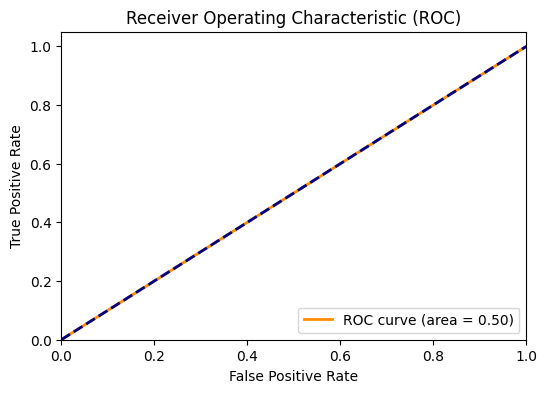

In [ ]:
# ROC Curve
y_proba = model.decision_function(X_test)
fpr, tpr, _ = roc_curve(y_test.map({'Fake': 0, 'Real': 1}), y_proba)
roc_auc = auc(fpr, tpr)

plt.figure(figsize=(6, 4))
plt.plot(fpr, tpr, color='darkorange', lw=2, label=f'ROC curve (area = {roc_auc:.2f})')
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC)')
plt.legend(loc="lower right")
plt.show()

In [5]:
import os
import pickle

# Load the model and vectorizer
model = pickle.load(open('best_model.pkl', 'rb'))
vectorizer = pickle.load(open('tfidf_vectorizer.pkl', 'rb'))

# Create the 'model' directory if it doesn't exist
os.makedirs('model', exist_ok=True)

# Save them for deployment
with open('model/fake_news_model.pkl', 'wb') as model_file:
    pickle.dump(model, model_file)

with open('model/tfidf_vectorizer.pkl', 'wb') as vectorizer_file:
    pickle.dump(vectorizer, vectorizer_file)

print('Model and Vectorizer saved successfully in the model/ directory.')

FileNotFoundError: [Errno 2] No such file or directory: 'best_model.pkl'

In [ ]:
!curl -X POST http://127.0.0.1:5000/predict -H "Content-Type: application/json" -d "{\"text\": \"Sample news article to predict.\"}"

curl: (7) Failed to connect to 127.0.0.1 port 5000 after 0 ms: Connection refused


In [ ]:
import requests

import requests

# Sample news articles for testing
fake_news = {
    "text": "Breaking news! Alien life was discovered on Mars by private space agencies."
}

In [ ]:
import os
import pickle

# Load the model and vectorizer
model = pickle.load(open('best_model.pkl', 'rb'))
vectorizer = pickle.load(open('tfidf_vectorizer.pkl', 'rb'))

# Create the 'model' directory if it doesn't exist
os.makedirs('model', exist_ok=True)

# Save them for deployment
with open('model/fake_news_model.pkl', 'wb') as model_file:
    pickle.dump(model, model_file)

with open('model/tfidf_vectorizer.pkl', 'wb') as vectorizer_file:
    pickle.dump(vectorizer, vectorizer_file)

print('Model and Vectorizer saved successfully in the model/ directory.')

FileNotFoundError: [Errno 2] No such file or directory: 'best_model.pkl'